Stock Price Analysis workflow
   -  Setting up the environment and data acquisition
   -  Historical trend in closing prices
   -  Track daily changes in stock prices and volume
   -  Deduce correlation between stock prices
   -  Evaluate moving averages and validate the Simple Moving Average models
   -  Create an equal weighted Index
   -  Back test on 1 year of data
   -  Establish correlation with benchmark SnP500
   -  Risk and return analysis of our index

In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, date

# chart settings
sns.set_style('whitegrid')
plt.style.use("petroff10")
%matplotlib inline



In [2]:
# Stock selection and acquisition
tickers = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'TSLA']

end = datetime.now()
start = date(end.year-1, end.month, end.day)

stock_data = {} # store the df in the dictionary
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start, end)
    stock_data[ticker].info()
    # print(stock_data[ticker].head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   253 non-null    float64
 1   (High, AAPL)    253 non-null    float64
 2   (Low, AAPL)     253 non-null    float64
 3   (Open, AAPL)    253 non-null    float64
 4   (Volume, AAPL)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   253 non-null    float64
 1   (High, NVDA)    253 non-null    float64
 2   (Low, NVDA)     253 non-null    float64
 3   (Open, NVDA)    253 non-null    float64
 4   (Volume, NVDA)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   253 non-null    float64
 1   (High, MSFT)    253 non-null    float64
 2   (Low, MSFT)     253 non-null    float64
 3   (Open, MSFT)    253 non-null    float64
 4   (Volume, MSFT)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   253 non-null    float64
 1   (High, AMZN)    253 non-null    float64
 2   (Low, AMZN)     253 non-null    float64
 3   (Open, AMZN)    253 non-null    float64
 4   (Volume, AMZN)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   253 non-null    float64
 1   (High, META)    253 non-null    float64
 2   (Low, META)     253 non-null    float64
 3   (Open, META)    253 non-null    float64
 4   (Volume, META)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-08 to 2025-01-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   253 non-null    float64
 1   (High, TSLA)    253 non-null    float64
 2   (Low, TSLA)     253 non-null    float64
 3   (Open, TSLA)    253 non-null    float64
 4   (Volume, TSLA)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


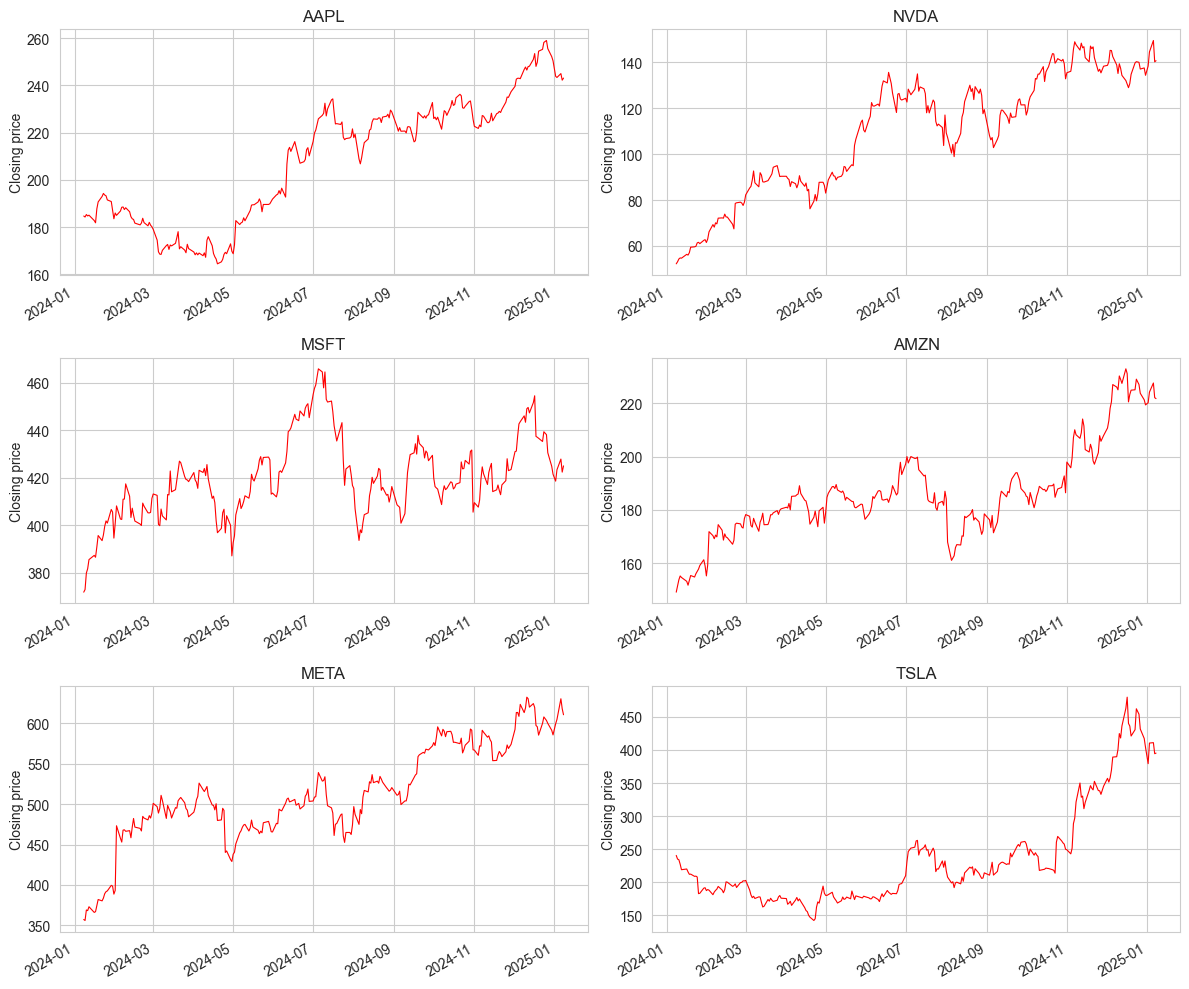

In [3]:
# visualizing the historical trend in the closing price of each Stock in a compact form

plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=1.2)

for i, ticker in enumerate(tickers, 1):
    ax = plt.subplot(3, 2, i)
    stock_data[ticker]['Close'].plot(ax = ax, linewidth = 0.8, color = "red")

    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.set_ylabel("Closing price", labelpad=2, fontsize = 10)

plt.tight_layout()

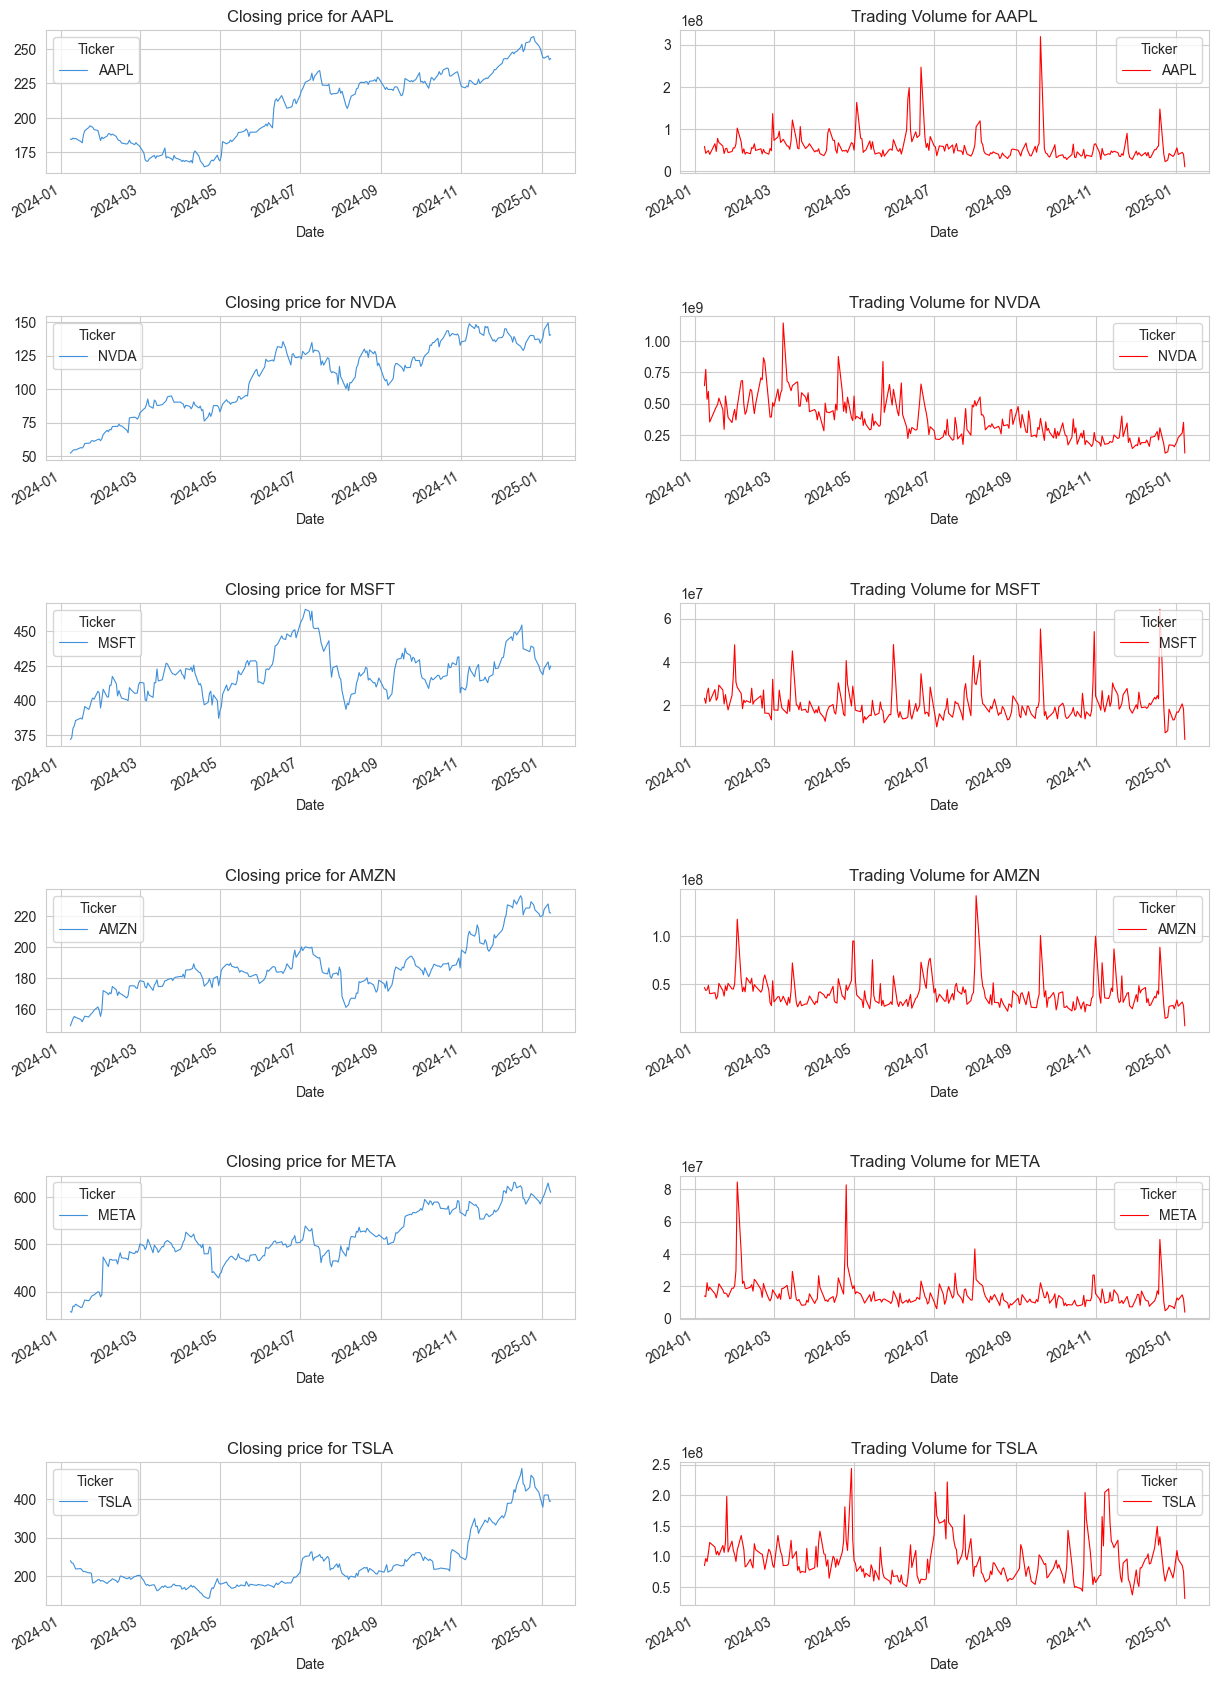

In [4]:
# Visualizing historical trend in closing prices and trading volume of each stock

fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=1)

for i, ticker in enumerate(tickers):
   stock_data[ticker]['Close'].plot(ax = axes[i,0], linewidth = 0.8)
   axes[i,0].set_title(f'Closing price for {ticker}', fontsize = 12)
   stock_data[ticker]['Volume'].plot(ax = axes[i,1], linewidth = 0.8, color = "red")
   axes[i,1].set_title(f'Trading Volume for {ticker}', fontsize = 12)

In [5]:
# fetching daily stock prices
stock = {}
for ticker in tickers:
   stock[ticker] = yf.Tickers(ticker)
   daily_price = stock[ticker].history(period = "1d")['Close'].iloc[-1]
   print(daily_price)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker
AAPL    243.054993
Name: 2025-01-08 00:00:00, dtype: float64
Ticker
NVDA    140.630005
Name: 2025-01-08 00:00:00, dtype: float64


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker
MSFT    425.140015
Name: 2025-01-08 00:00:00, dtype: float64
Ticker
AMZN    221.759995
Name: 2025-01-08 00:00:00, dtype: float64



[*********************100%***********************]  1 of 1 completed

Ticker
META    610.440002
Name: 2025-01-08 00:00:00, dtype: float64
Ticker
TSLA    395.016815
Name: 2025-01-08 00:00:00, dtype: float64


            Returns for AAPL       Close
Date                                    
2025-01-02         -2.623589  243.850006
2025-01-03         -0.200945  243.360001
2025-01-06          0.673898  245.000000
2025-01-07         -1.138773  242.210007
2025-01-08          0.362699  243.088501
            Returns for NVDA       Close
Date                                    
2025-01-02          2.993525  138.309998
2025-01-03          4.453766  144.470001
2025-01-06          3.433233  149.429993
2025-01-07         -6.216954  140.139999
2025-01-08          0.356786  140.639999
            Returns for MSFT       Close
Date                                    
2025-01-02         -0.692767  418.579987
2025-01-03          1.139572  423.350006
2025-01-06          1.062950  427.850006
2025-01-07         -1.280825  422.369995
2025-01-08          0.619123  424.984985
            Returns for AMZN       Close
Date                                    
2025-01-02          0.378323  220.220001
2025-01-03      

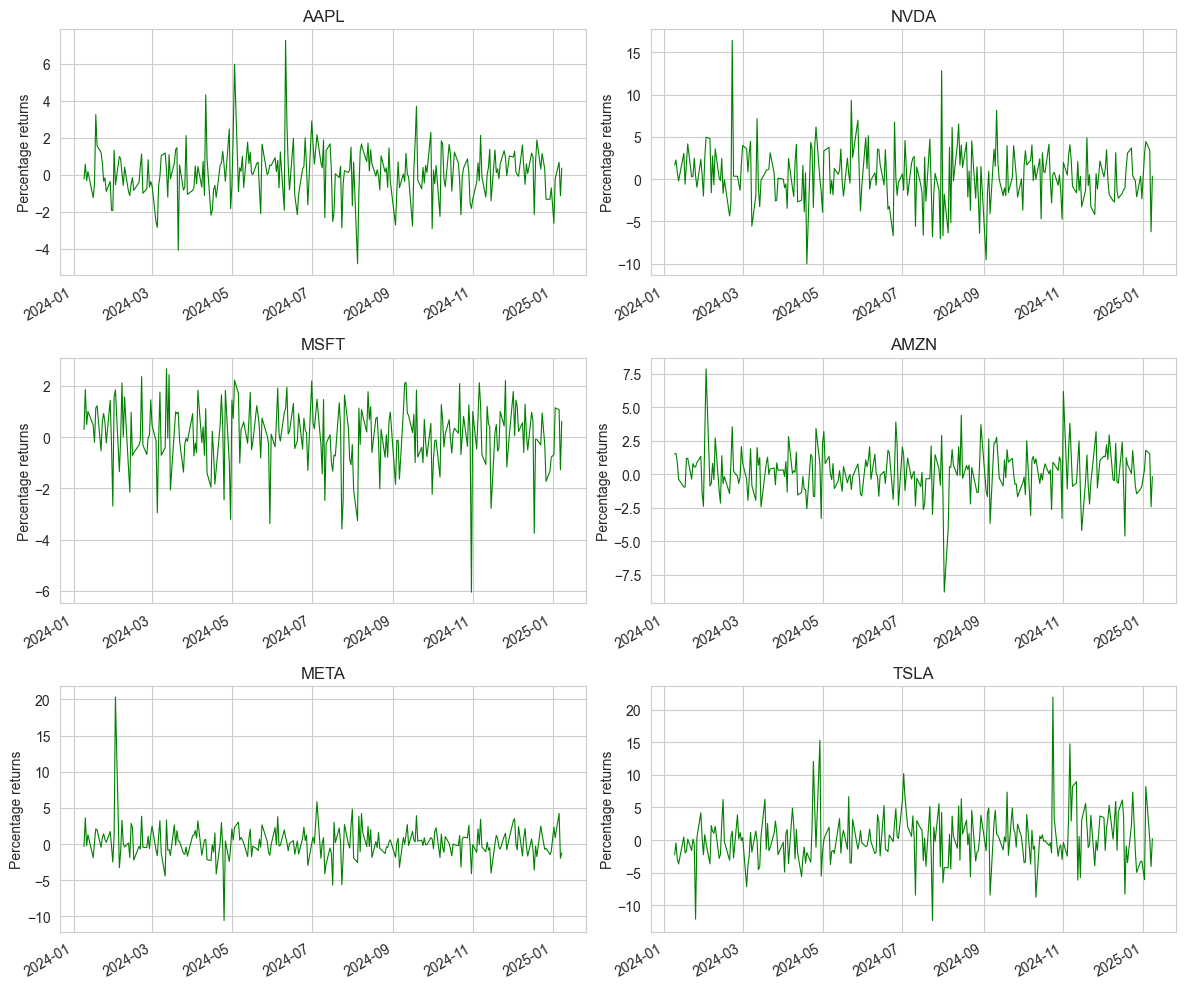

In [6]:
# evaluating the percentage return for each stock

percentage_return = {}
for ticker in tickers:
   percentage_return[ticker] = stock_data[ticker]['Close'].pct_change()*100
   percentage_return[ticker] = percentage_return[ticker].set_axis([f'Returns for {ticker}'], axis = 1)
   percentage_return[ticker]['Close'] = stock_data[ticker]['Close'] 
   print(percentage_return[ticker].tail())

# visualizing the percentage returns for each stock

plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=1.2)

for i, ticker in enumerate(tickers, 1):
    ax = plt.subplot(3, 2, i)
    percentage_return[ticker][f'Returns for {ticker}'].plot(ax = ax, linewidth = 0.8, color = 'green')
    ax.set_title(ticker.upper())
    ax.set_xlabel("")
    ax.set_ylabel("Percentage returns", labelpad=2, fontsize = 10)

plt.tight_layout()


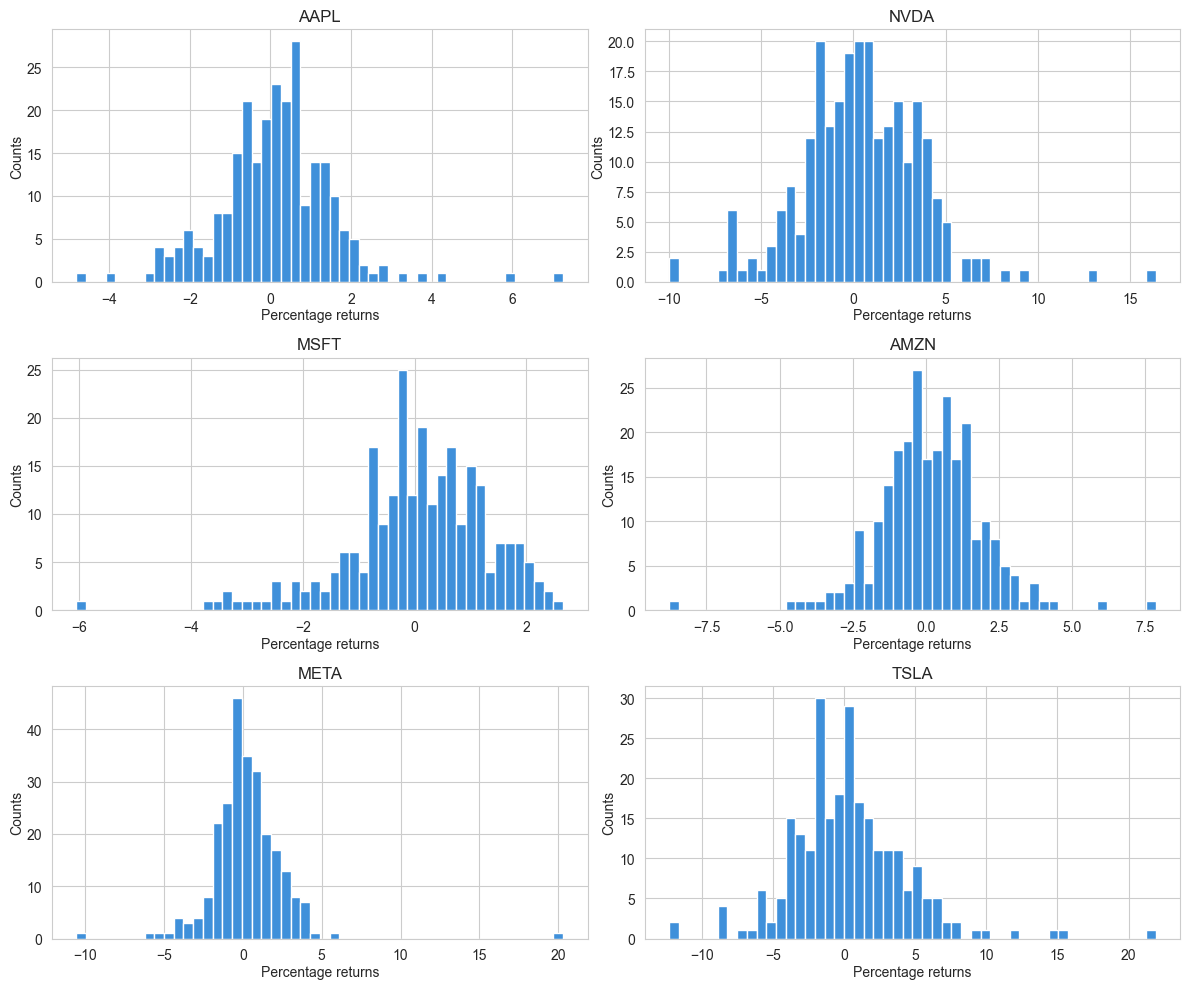

In [7]:
# Visualizing the stock count for a particular return percentage using a histogram

plt.figure(figsize=(12, 10))
plt.subplots_adjust(top = 1.25, bottom = 1.2, hspace = 1.2)

for i, ticker in enumerate(tickers, 1):
    ax = plt.subplot(3, 2, i)  
    percentage_return[ticker][f'Returns for {ticker}'].hist(bins = 50)
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("Percentage returns",labelpad=2, fontsize = 10 )
    ax.set_ylabel("Counts", labelpad=2, fontsize = 10)

plt.tight_layout()

            AAPL_returns  NVDA_returns  MSFT_returns  AMZN_returns  \
Date                                                                 
2024-01-08           NaN           NaN           NaN           NaN   
2024-01-09     -0.226342      1.697519      0.293582      1.522461   
2024-01-10      0.567136      2.277002      1.857404      1.559094   
2024-01-11     -0.322244      0.868446      0.485939      0.943210   
2024-01-12      0.177808     -0.204306      0.998361     -0.360870   
...                  ...           ...           ...           ...   
2025-01-02     -2.623589      2.993525     -0.692767      0.378323   
2025-01-03     -0.200945      4.453766      1.139572      1.802743   
2025-01-06      0.673898      3.433233      1.062950      1.525491   
2025-01-07     -1.138773     -6.216954     -1.280825     -2.416414   
2025-01-08      0.362699      0.356786      0.619123     -0.162082   

            META_returns  TSLA_returns  
Date                                    
2024-01

<Axes: >

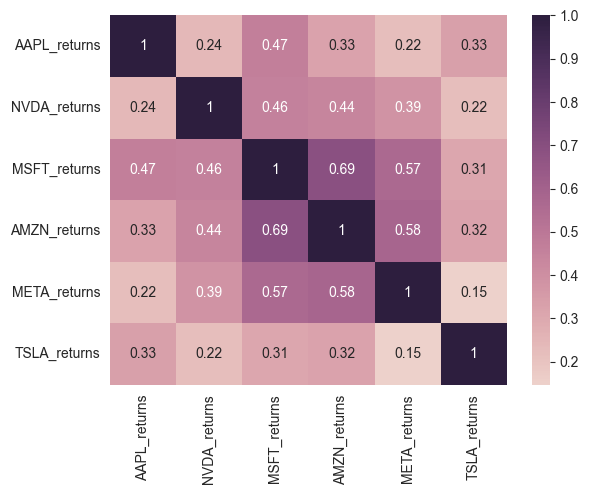

In [8]:
# Visualizing the percentage return correlation for the given stocks.

# first create a separate data frame for Returns of each ticker from the dataframes in the data dictionary using dictionary comprehension
returns_df = pd.concat({ticker: df_re[f'Returns for {ticker}'] for ticker, df_re in percentage_return.items()}, axis=1)

# assigning column names pertaining to each stock dataframe
returns_df.columns = [f"{ticker}_returns" for ticker in percentage_return.keys()]

print(returns_df)

returns_df.corr()

# now create a correlation heatmap of the new dataframe that consists of returns of the six diffrent stocks and six different columns.
sns.heatmap(returns_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))



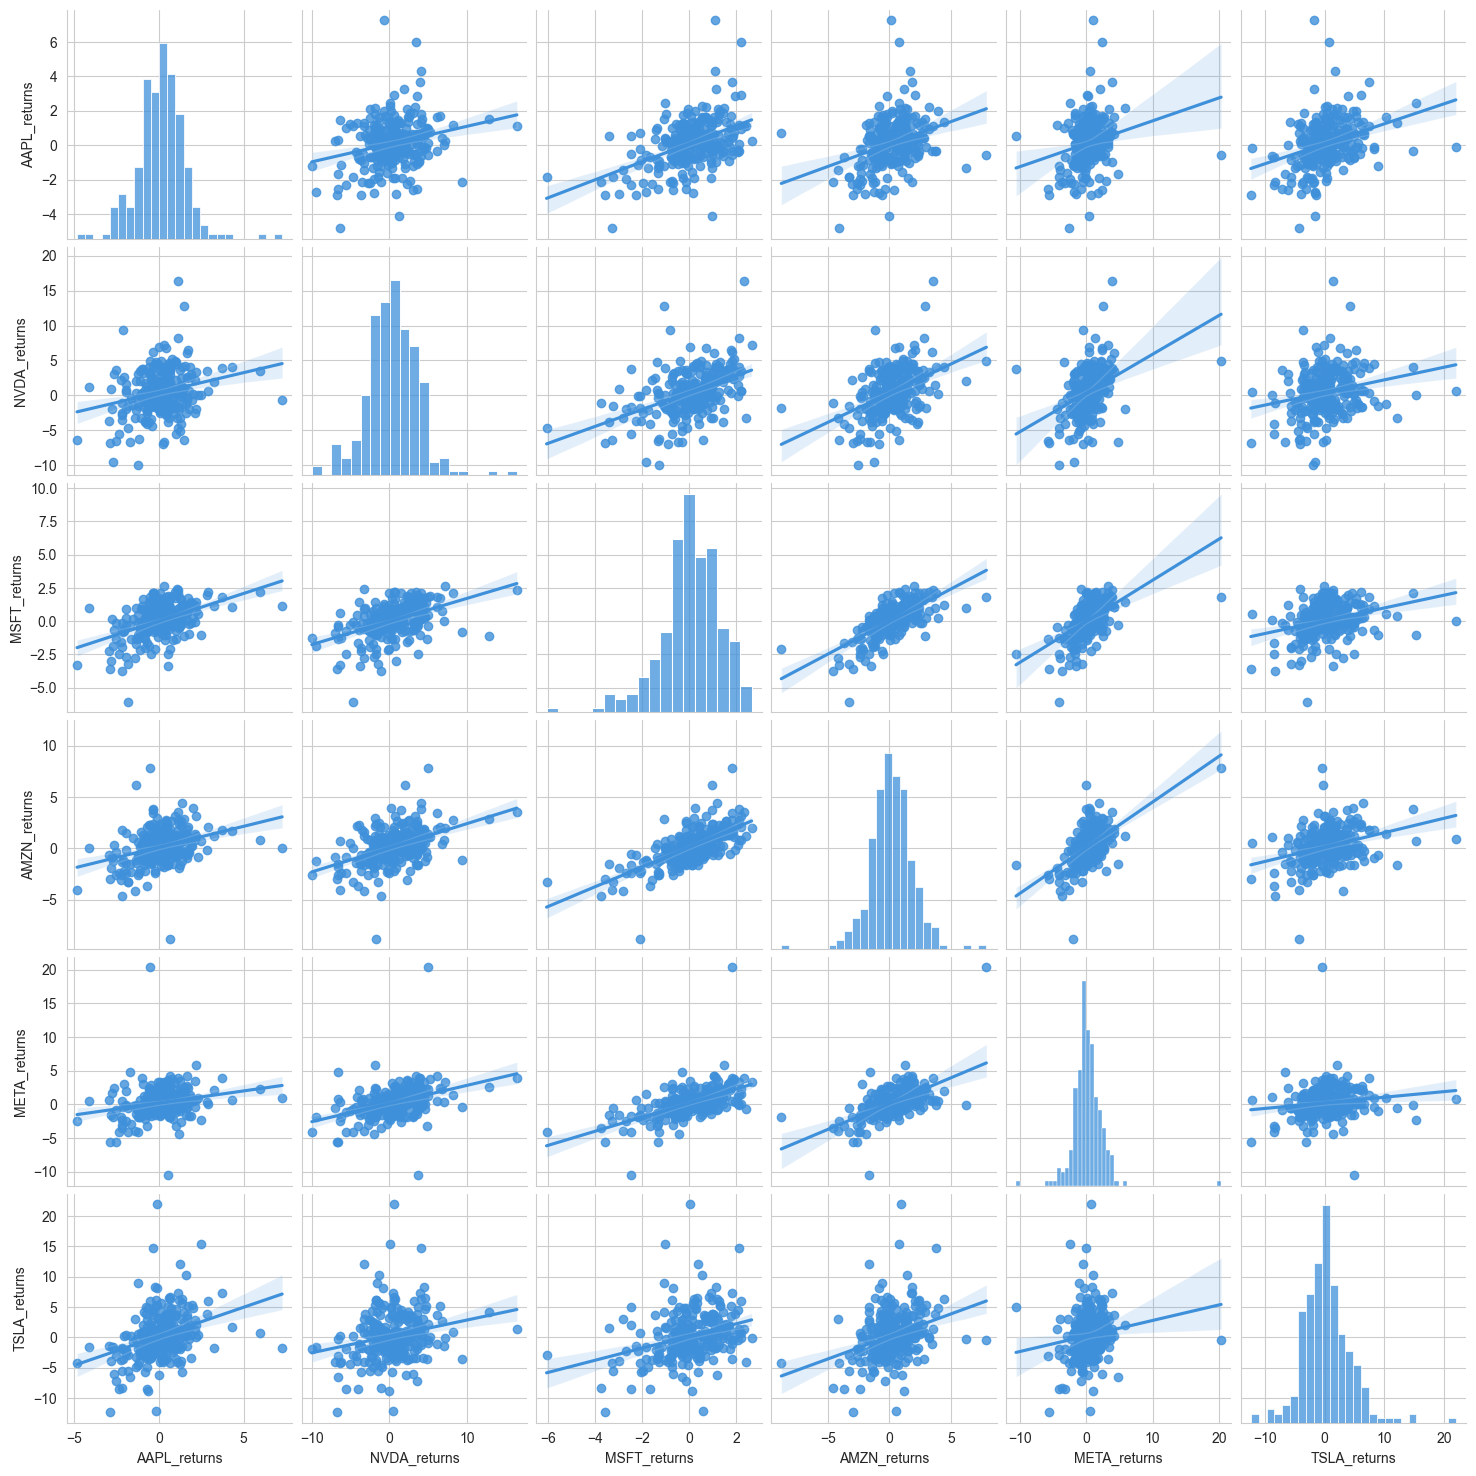

In [9]:
# We now create a pairplot for comparative analysis of all stock returns

sns.pairplot(returns_df, kind='reg')

Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-01-08  184.655365  184.695178  180.615161  181.202281  59144500   
2024-01-09  184.237411  184.247357  181.839157  183.023358  42841800   
2024-01-10  185.282288  185.491255  183.023350  183.451262  46792900   
2024-01-11  184.685226  186.138115  182.724829  185.630592  49128400   
2024-01-12  185.013611  185.829621  184.287174  185.152928  40444700   

Price            SMA_5      SMA_10      SMA_20      SMA_50  
Ticker                                                      
Date                                                        
2024-01-08  184.655365  184.655365  184.655365  184.655365  
2024-01-09  184.446388  184.446388  184.446388  184.446388  
2024-01-10  184.725021  184.725021  184.725021  184.725021  
2024-01-11  184.715073  184.715073  184.715073  184.71507

Text(0.5, 1.0, 'SMA of TESLA')

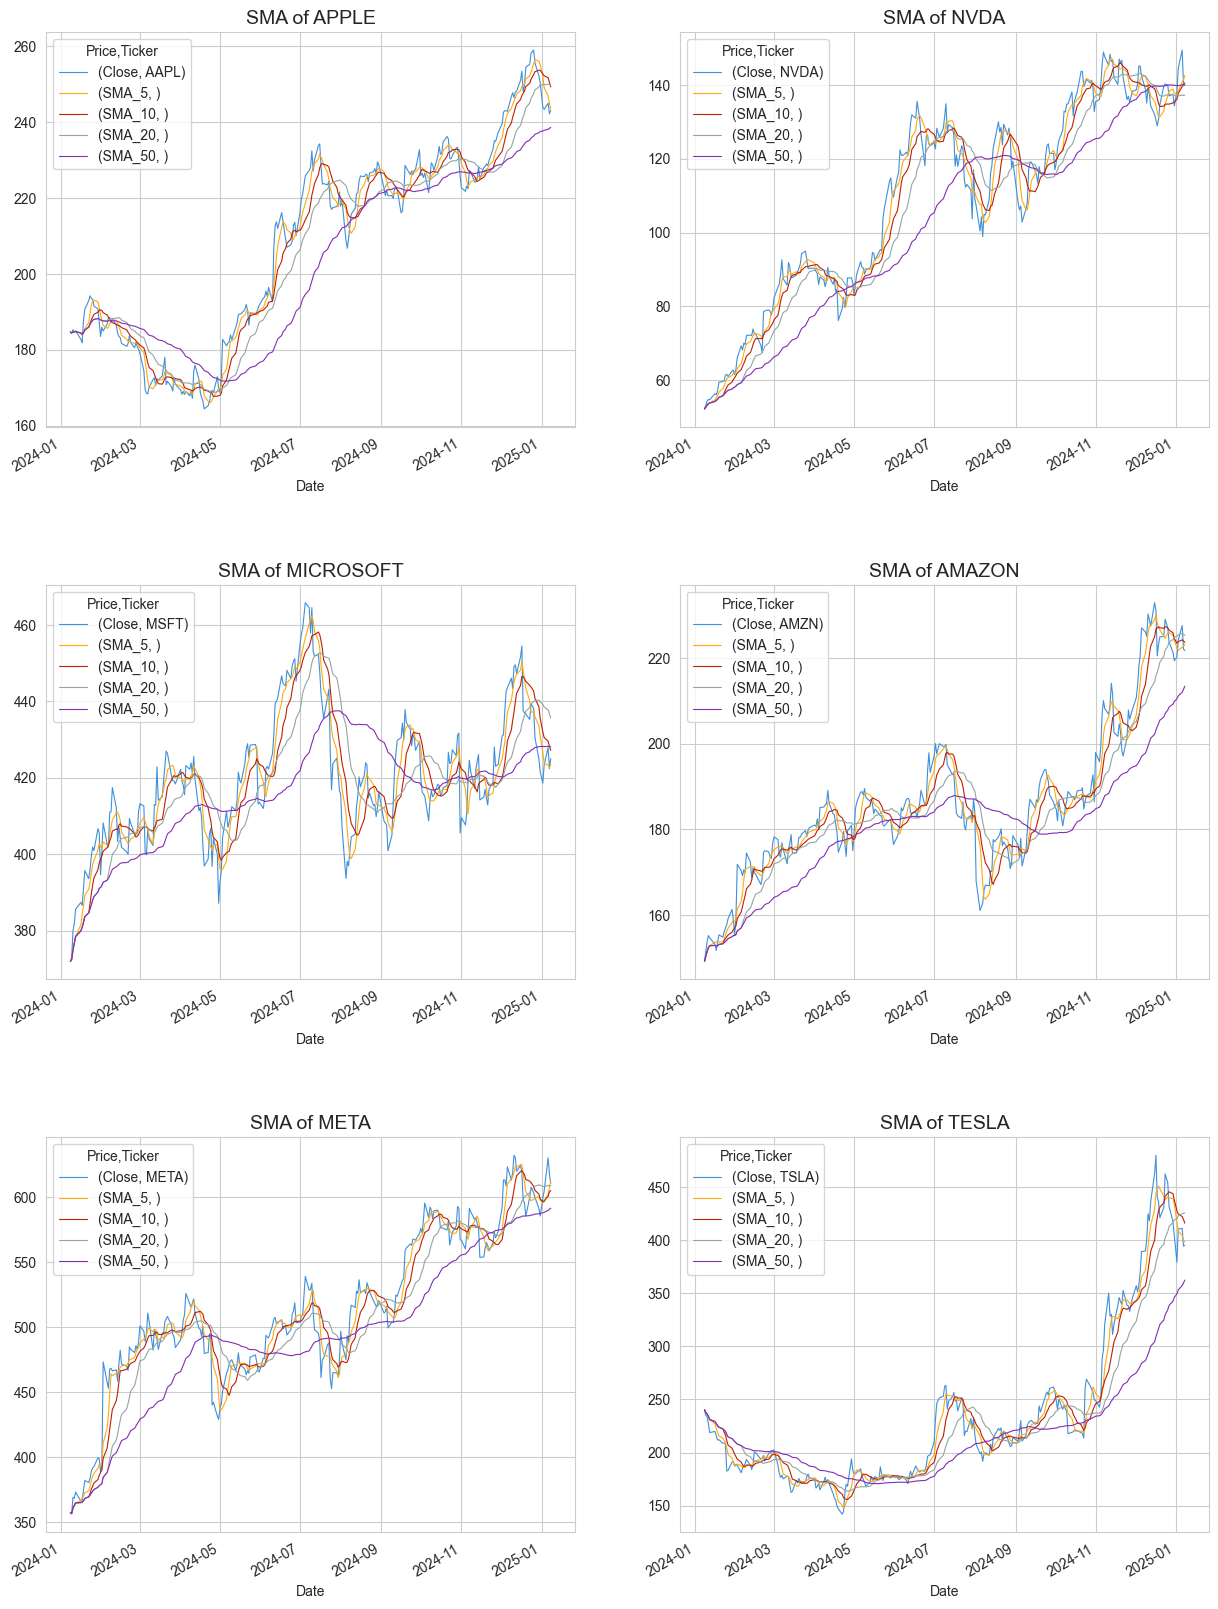

In [10]:
# evaluating simple moving averages as a method of time-series analysis and forecasting

ma_dict = {}


for ticker, df in stock_data.items(): # creating a new data dictionary with 3 new columns for moving averages appended to each data frame in the dictionary
     sma_dict = df.copy()
     sma_dict['SMA_5'] = sma_dict['Close'].rolling(window=5, min_periods=1).mean()
     sma_dict['SMA_10'] = sma_dict['Close'].rolling(window=10, min_periods=1).mean()
     sma_dict['SMA_20'] = sma_dict['Close'].rolling(window=20, min_periods=1).mean()
     sma_dict['SMA_50'] = sma_dict['Close'].rolling(window=50, min_periods=1).mean()

     ma_dict[ticker] = sma_dict
     print(ma_dict[ticker].head())

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplots_adjust(top=1.2, bottom=0.8, hspace=0.4)

ma_dict['AAPL'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[0,0], linewidth = 0.8)
axes[0,0].set_title('SMA of APPLE', fontsize = 14)
ma_dict['NVDA'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[0,1], linewidth = 0.8)
axes[0,1].set_title('SMA of NVDA', fontsize = 14)
ma_dict['MSFT'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[1,0], linewidth = 0.8)
axes[1,0].set_title('SMA of MICROSOFT', fontsize = 14)
ma_dict['AMZN'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[1,1], linewidth = 0.8)
axes[1,1].set_title('SMA of AMAZON', fontsize = 14)
ma_dict['META'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[2,0], linewidth = 0.8)
axes[2,0].set_title('SMA of META', fontsize = 14)
ma_dict['TSLA'][['Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50']].plot(ax = axes[2,1], linewidth = 0.8)
axes[2,1].set_title('SMA of TESLA', fontsize = 14)


  Tickers   rmse_5  rmse_10  rmse_20  rmse_50
0    AAPL   3.2613   5.0022   7.3450  12.5001
1    NVDA   3.8045   5.7156   8.3215  13.2808
2    MSFT   5.5952   8.6395  12.1651  15.4424
3    AMZN   3.4660   5.4029   7.4013  11.2714
4    META  11.2917  17.0891  24.8365  35.3400
5    TSLA  11.4742  17.6063  26.4840  43.6330


Text(0.5, 0, 'Tickers')

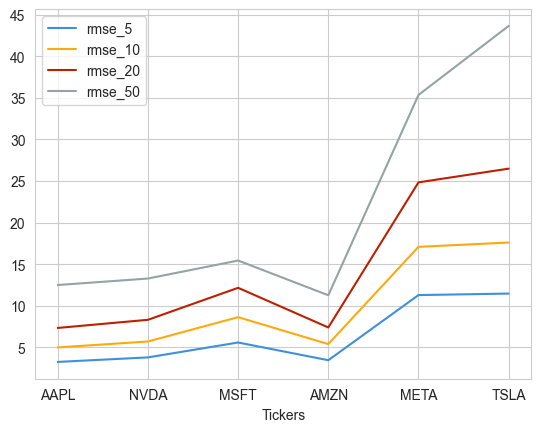

In [11]:
# validating the SMA models: a simple exercise in model validation. 

# evaluating the Root Mean Squared Error

from sklearn.metrics import mean_squared_error


for ticker in tickers:
    rmse_5 = np.sqrt(mean_squared_error(stock_data[ticker]['Close'].values, ma_dict[ticker]['SMA_5'].values))
    #print(f'RMSE for 5 day rolling window for {ticker} is: {round(rmse_5, 4)}')

    rmse_10 = np.sqrt(mean_squared_error(stock_data[ticker]['Close'].values, ma_dict[ticker]['SMA_10'].values))
    #print(f'RMSE for 10 day rolling window for {ticker} is: {round(rmse_10, 4)}')

    rmse_20 = np.sqrt(mean_squared_error(stock_data[ticker]['Close'].values, ma_dict[ticker]['SMA_20'].values))
    #print(f'RMSE for 20 day rolling window for {ticker} is: {round(rmse_20, 4)}')

    rmse_50 = np.sqrt(mean_squared_error(stock_data[ticker]['Close'].values, ma_dict[ticker]['SMA_50'].values))
    #print(f'RMSE for 50 day rolling window for {ticker} is: {round(rmse_50, 4)}')
      
rmse_5_list = [3.2613, 3.8045, 5.5952, 3.466, 11.2917, 11.4742 ]
rmse_10_list = [5.0022,5.7156,8.6395,5.4029,17.0891,17.6063]
rmse_20_list = [7.345,8.3215,12.1651,7.4013,24.8365,26.484]
rmse_50_list = [12.5001,13.2808,15.4424,11.2714,35.34,43.633]


RMSE = pd.DataFrame(tickers, columns=['Tickers'])
RMSE['rmse_5'] = rmse_5_list
RMSE['rmse_10'] = rmse_10_list
RMSE['rmse_20'] = rmse_20_list
RMSE['rmse_50'] = rmse_50_list

print(RMSE)


# visualizing root mean squared errors of the SMA models. The one with the lowest RMSE should be the optimum model.  
x = list(RMSE.index)

RMSE.plot() 
plt.xticks(x, tickers) # changing the x-axis values from index values of the rows to the ticker names for each row. 
plt.xlabel('Tickers') 


16.666666666666668
            EW_Index for AAPL
Date                         
2024-01-08          30.775894
2024-01-09          30.706235
2024-01-10          30.880381
2024-01-11          30.780871
2024-01-12          30.835602
            EW_Index for NVDA
Date                         
2024-01-08           8.706364
2024-01-09           8.854156
2024-01-10           9.055766
2024-01-11           9.134410
2024-01-12           9.115748
            EW_Index for MSFT
Date                         
2024-01-08          61.984818
2024-01-09          62.166794
2024-01-10          63.321482
2024-01-11          63.629186
2024-01-12          64.264435
            EW_Index for AMZN
Date                         
2024-01-08          24.850001
2024-01-09          25.228333
2024-01-10          25.621666
2024-01-11          25.863332
2024-01-12          25.769999
            EW_Index for META
Date                         
2024-01-08          59.549189
2024-01-09          59.344971
2024-01-10          6

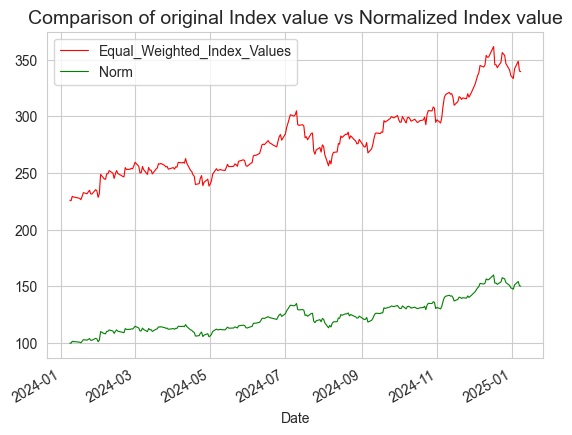

In [12]:
# Creating a simple equal weighted index and running backtest on 1 year of data

# finding the equal weight
equal_weight = 100/len(tickers)
print(equal_weight)

EWI_value = {}

for ticker in tickers:
   EWI_value[ticker] = equal_weight*stock_data[ticker]['Close']/100
   EWI_value[ticker] = EWI_value[ticker].set_axis([f'EW_Index for {ticker}'], axis = 1)
   print(EWI_value[ticker].head())

# create a dataframe consisting of the EWI values of the relevant stocks from dictionary using dictionary comprehension
EWI_values = pd.concat({ticker: df_ew[f'EW_Index for {ticker}'] for ticker, df_ew in EWI_value.items()}, axis=1)

EWI_values.columns = [f"EWI_Index for {ticker}" for ticker in EWI_value.keys()]
print(EWI_values.head())

#create a new dataframe that consists of the summed values of each row of the EWI_values dataframe to set our Index value
EWI = pd.DataFrame(EWI_values.sum(axis=1))
EWI.columns = ['Equal_Weighted_Index_Values']

# Normalize the index
base_value = 100
divisor = EWI.iloc[0]/base_value
print(divisor)

EWI['Norm'] = EWI/divisor
print(EWI.head())

# graphical representation of the original index value vs the normalized value
EWI.plot(linewidth = 0.8, color = ('red', 'green')).set_title('Comparison of original Index value vs Normalized Index value', fontsize = 14)
EWI.info()



In [13]:
# obtain S&P 500 benchmark data

SnP_data = yf.download('^GSPC', start, end)
# print(SnP_data.head())

# modify the dataframe to contain only the Closing price column
SnP_data_mod = pd.DataFrame(SnP_data['Close'])

# normalizing to the same base value as our index
snp_divisor = SnP_data_mod.iloc[0]/base_value
SnP_data_mod['Norm'] = SnP_data_mod/snp_divisor
print(SnP_data_mod.head())


[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC        Norm
Date                               
2024-01-08  4763.540039  100.000000
2024-01-09  4756.500000   99.852210
2024-01-10  4783.450195  100.417970
2024-01-11  4780.240234  100.350584
2024-01-12  4783.830078  100.425945


              EWI Norm    S&P Norm
Date                              
2024-01-08  100.000000  100.000000
2024-01-09   99.787212   99.852210
2024-01-10  101.521663  100.417970
2024-01-11  101.201083  100.350584
2024-01-12  101.196625  100.425945


Text(0.5, 1.0, 'Correlation between EWI and Benchmark index')

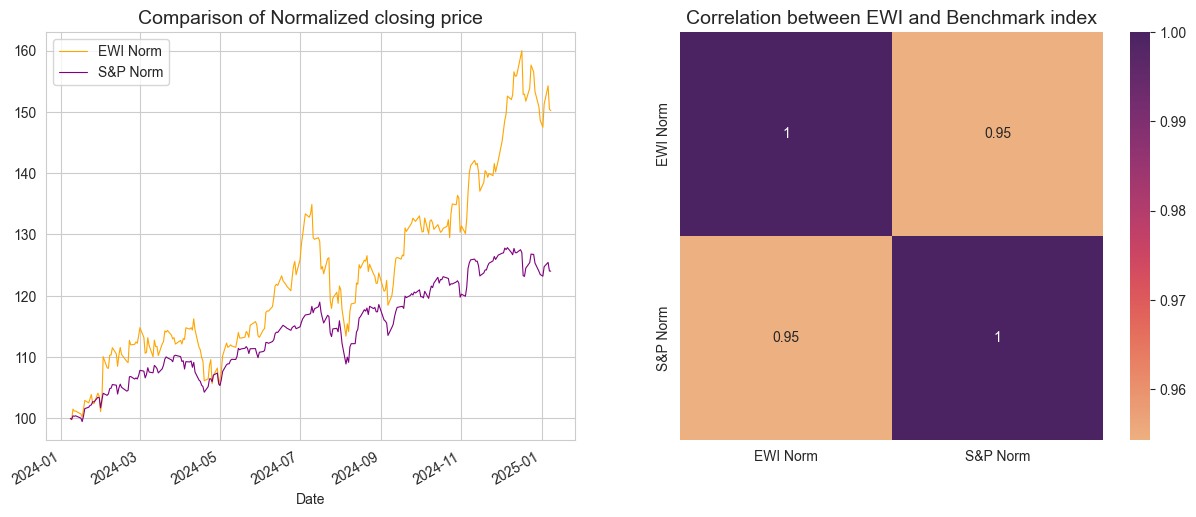

In [14]:
# creating new dataframe containing the normalized closing prices of our index and S&P500 benchmark for comparison

index_compare = pd.DataFrame(EWI['Norm'])
index_compare.columns = ['EWI Norm']
index_compare['S&P Norm'] = SnP_data_mod['Norm']
print(index_compare.head())

# visualizing the comparison and correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

index_compare.plot(linewidth = 0.8, color = ('orange', 'purple'), ax=axes[0])
axes[0].set_title('Comparison of Normalized closing price', fontsize = 14)

sns.heatmap(index_compare.corr(), annot=True, cmap='flare', ax=axes[1])
axes[1].set_title('Correlation between EWI and Benchmark index', fontsize = 14)

            PR of EWI  PR of S&P
Date                            
2024-01-08        NaN        NaN
2024-01-09  -0.212788  -0.147790
2024-01-10   1.738150   0.566597
2024-01-11  -0.315776  -0.067106
2024-01-12  -0.004405   0.075098


Text(0.5, 1.0, 'Correlation between EWI and Benchmark index daily returns')

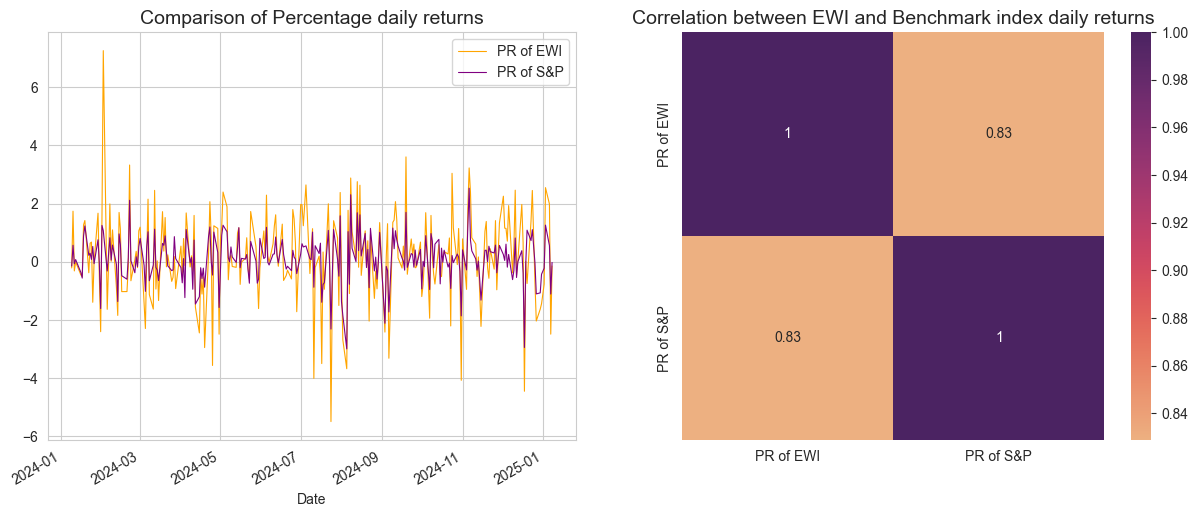

In [15]:
# comparing the percentage daily return of the Equal Weighted Index and Benchmark index

returns_compare = pd.DataFrame(EWI['Norm'].pct_change()*100)
returns_compare.columns = ['PR of EWI']
returns_compare['PR of S&P'] = SnP_data_mod['Norm'].pct_change()*100
print(returns_compare.head())

# visualizing the comparison and correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

returns_compare.plot(linewidth = 0.8, color = ('orange', 'purple'), ax=axes[0])
axes[0].set_title('Comparison of Percentage daily returns', fontsize = 14)

sns.heatmap(returns_compare.corr(), annot=True, cmap='flare', ax=axes[1])
axes[1].set_title('Correlation between EWI and Benchmark index daily returns', fontsize = 14)


In [16]:
# risk analysis using alpha-beta ratio 

from sklearn.linear_model import LinearRegression

#def risk_analysis():
returns_compare_clean = returns_compare.dropna(axis=0)
returns_compare_clean.head()

x = returns_compare_clean[['PR of S&P']].values
# y = returns_compare_clean['PR of EWI'].values

reg_model = LinearRegression()
reg_model_EWI = reg_model.fit(x, returns_compare_clean['PR of EWI'])

alpha = np.round(reg_model_EWI.intercept_, 4)
beta = np.round(reg_model_EWI.coef_, 4)
#mse = metrics.mean_squared_error(y,x)
print(alpha, beta)


if alpha > 0.05:
    print('Index performance is excellent')
elif 0.01 <= alpha <= 0.05:
    print('Index is performing okay')
else:
    print('Index has below average performance')

if beta < 0.8:
    print('Low risk index')
elif 0.8 <= beta <=1.2:
    print('Moderate risk index')
else:
    print('High risk index')


0.0322 [1.5909]
Index is performing okay
High risk index


In [17]:
# we perform an OLS regression as well to obtain the R-squared value of the model

X = x
y = returns_compare_clean['PR of EWI'].values
X = sm.add_constant(X)  # Add a constant term (intercept) to the regression
OLS_model = sm.OLS(y, X).fit()

print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     548.1
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.90e-65
Time:                        17:25:23   Log-Likelihood:                -317.92
No. Observations:                 252   AIC:                             639.8
Df Residuals:                     250   BIC:                             646.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.054      0.593      0.5

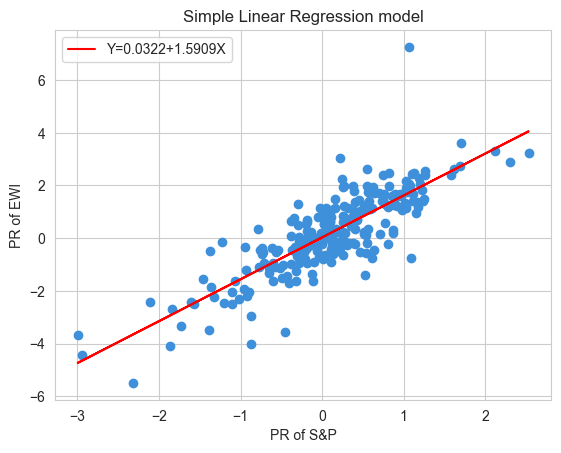

In [18]:
plt.scatter(x,y)
plt.xlabel('PR of S&P')
plt.ylabel('PR of EWI')
plt.title('Simple Linear Regression model')
plt.plot(x, reg_model.predict(x), label='Y={:.4f}+{:.4f}X'.format(alpha, beta[0]), color = 'red')
plt.legend()

We see that the Linear Regression model fits the percentage return data well and follows the average trend. This is also established by the R-squared value of 0.687 for the LR model. However, there is quite high volatility (high Beta ratio) and we infer that the data definitely has some seasonality to it, and is time-dependent; we confirm this by performing checks for stationarity and seasonality in the following code snippets.

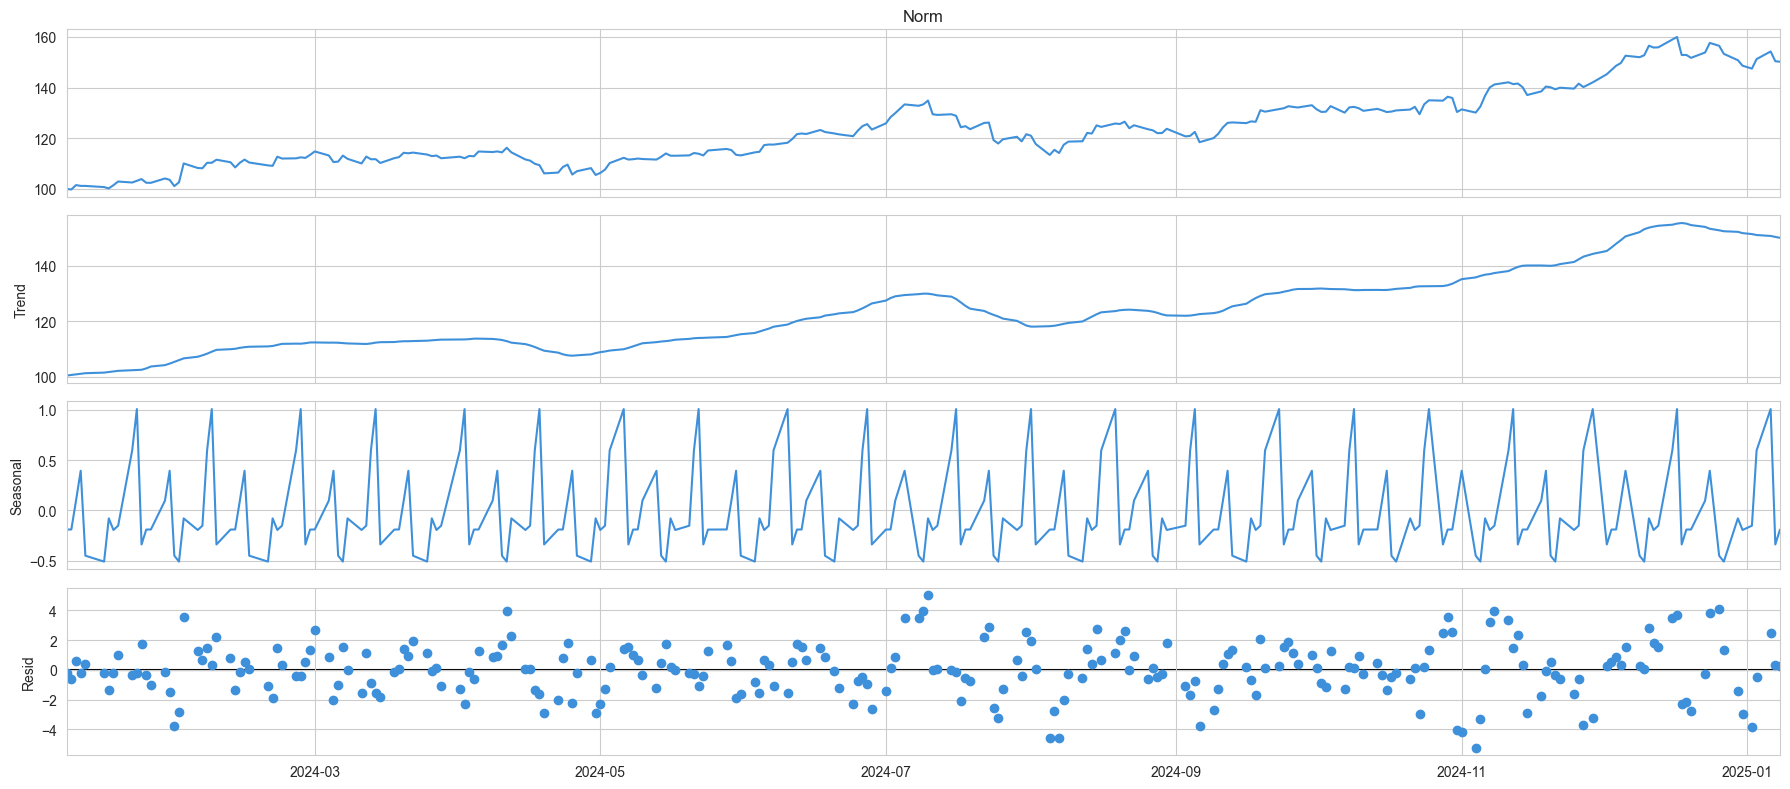

In [19]:
# checking for stationarity of EWI for time-series analysis and future model prediction

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_EWI = sm.tsa.seasonal_decompose(EWI['Norm'], model='additive', period=12, extrapolate_trend=1)
fig = decomposition_EWI.plot()
plt.show()

<Axes: xlabel='Date'>

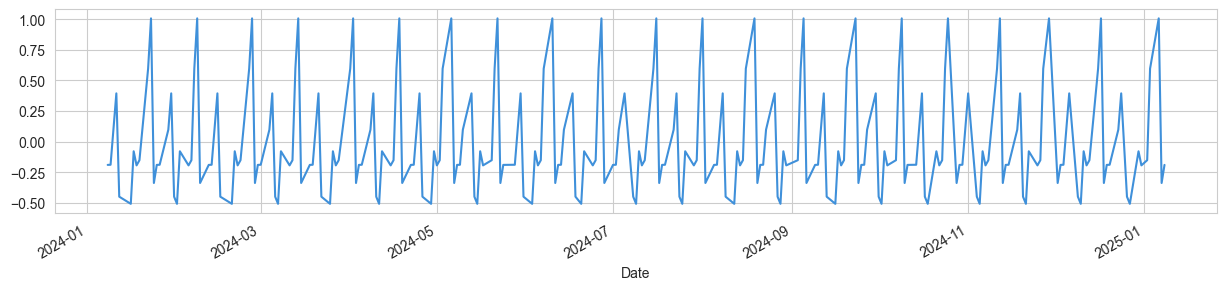

In [20]:
plt.figure(figsize=(15,3))
decomposition_EWI.seasonal.plot()

# exhibits that seasonality is infact additive in nature.

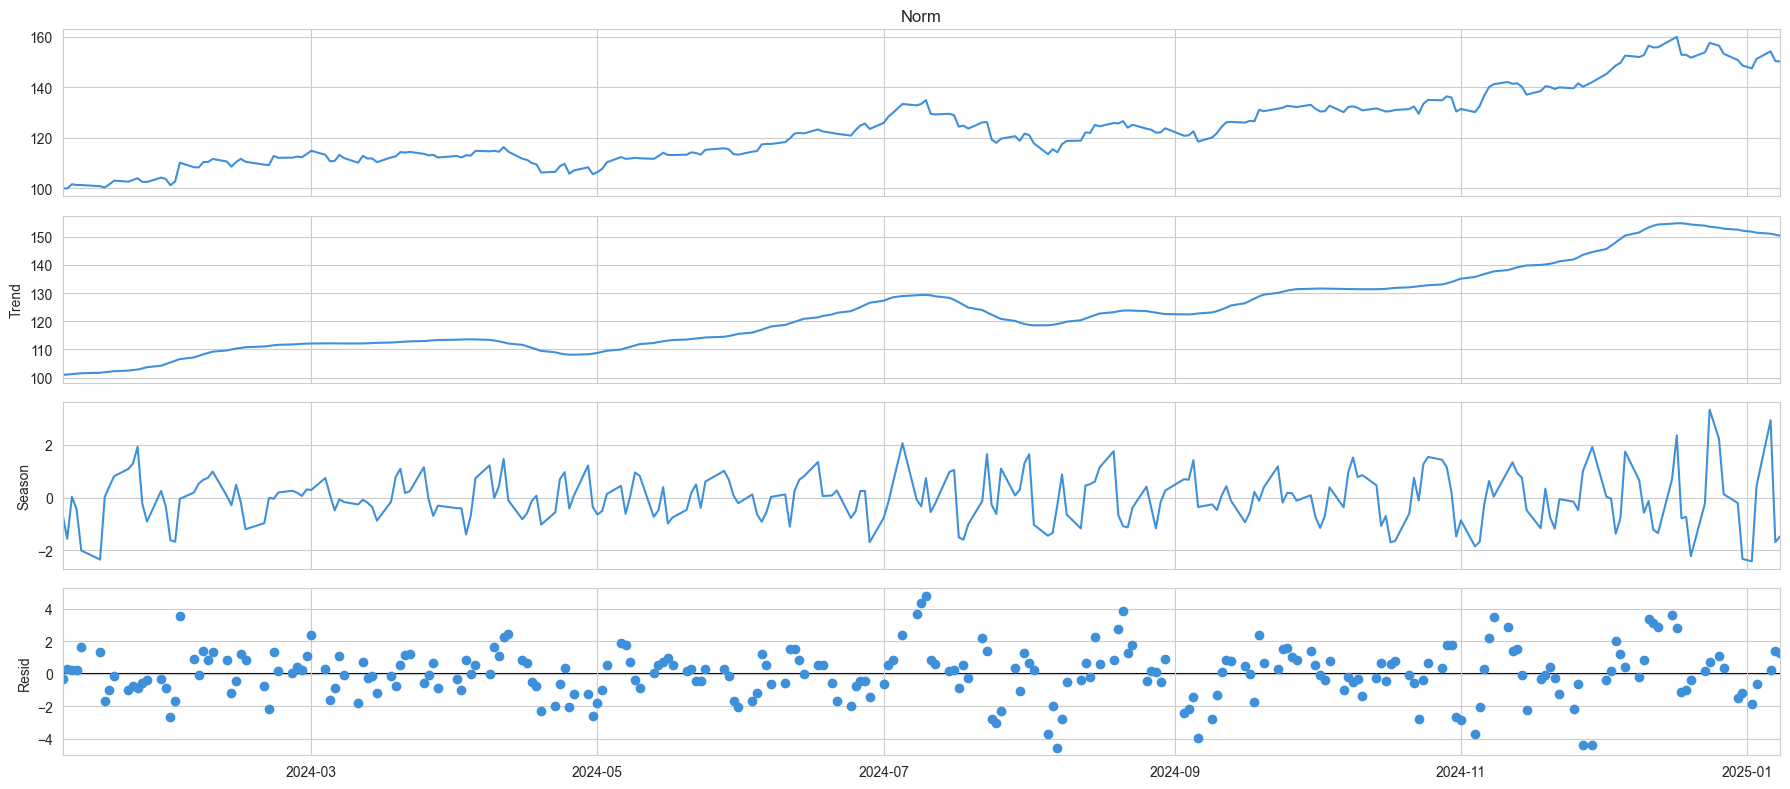

In [21]:
stl = sm.tsa.STL(EWI['Norm'], period=12)
result_stl = stl.fit().plot()

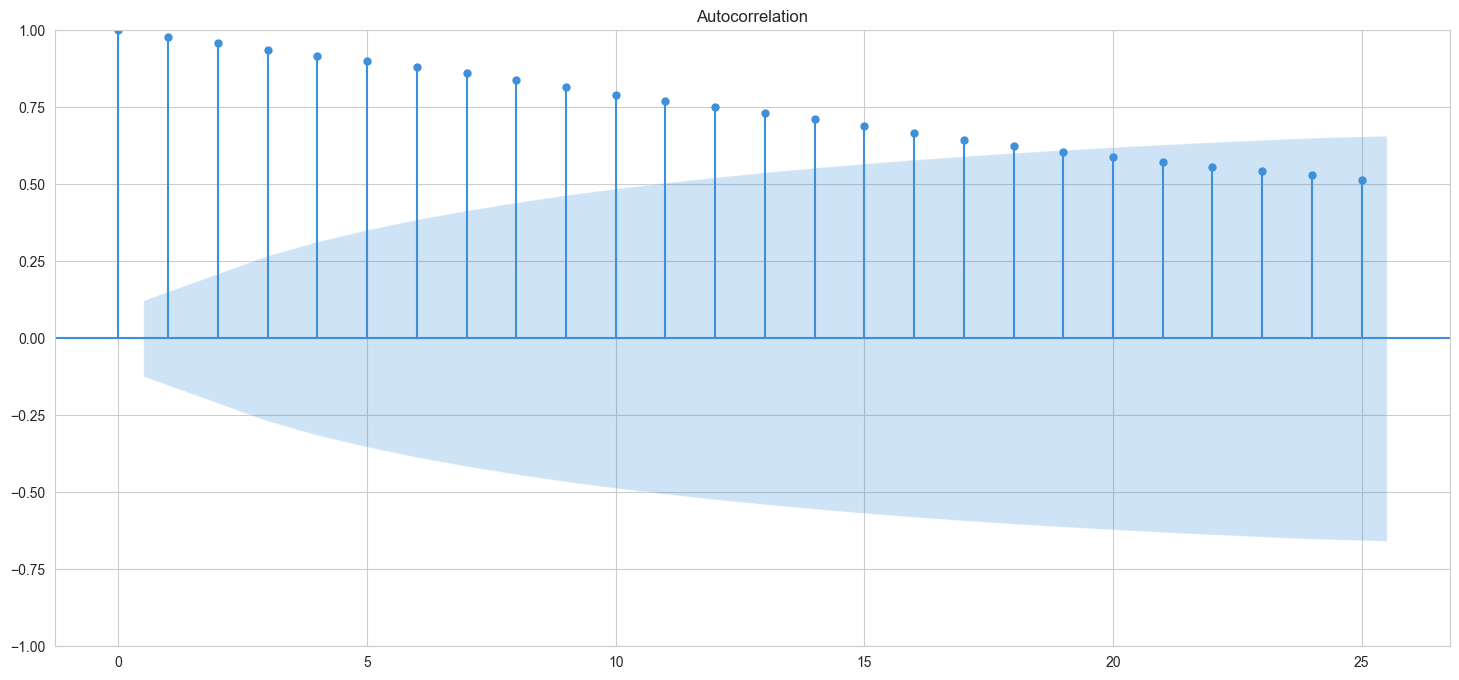

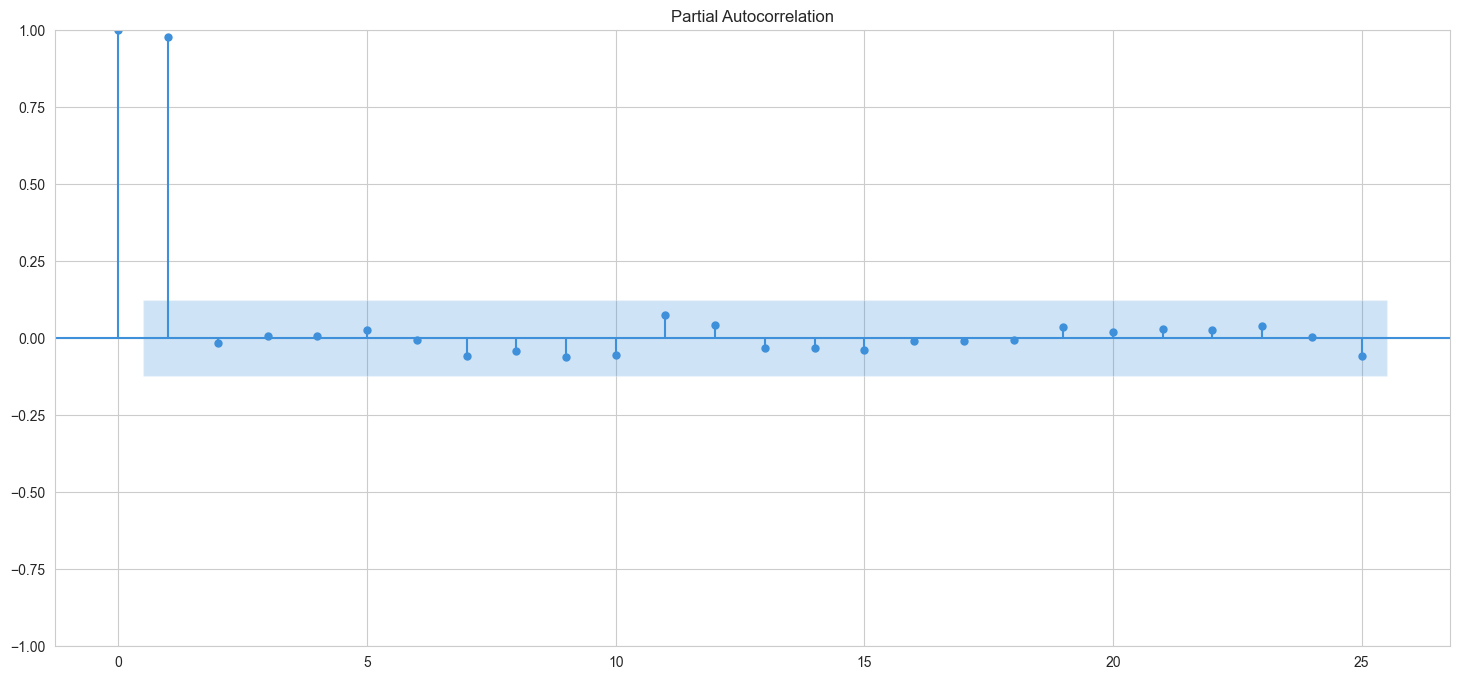

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'data' is the time series data
plot_acf(EWI['Norm'])
plot_pacf(EWI['Norm'])
plt.show()

# The autocorrelation function (ACF) plot shows a very slow, linear decay pattern - typical of non-stationary time series. 
# The autocorrelation is also positive.

In [23]:
# conducting stationarity checks using Augmented Dickey-Fuller test for predictive modelling

from statsmodels.tsa.stattools import adfuller

def adf_analysis(timeseries):
   print(f'Result of Augmented Dickey-Fuller test:')
   adftest = adfuller(timeseries, autolag='AIC')
   adfout = pd.Series(adftest[0:4], index = ['ADF Statistics', 'p-value','# of lags', '# of observations'])
   for key, value in adftest[4].items():
      adfout[f'Critical value at {key}%'] = value
   print(adfout)
   if (adftest[0] > value for value in adftest[4].items()) and adftest[1] > 0.05: 
      # p-value greater than threshold of 0.05 and ADF statistics greater than critical vlaues means data is not stationary
      print('Null hypothesis accepted and data is time-dependent')
   else:
      print('Data is stationary')

# adf_analysis(SnP_data_mod['Norm'])
adf_analysis(EWI['Norm'])



Result of Augmented Dickey-Fuller test:
ADF Statistics             -0.832259
p-value                     0.809462
# of lags                   0.000000
# of observations         252.000000
Critical value at 1%%      -3.456569
Critical value at 5%%      -2.873079
Critical value at 10%%     -2.572919
dtype: float64
Null hypothesis accepted and data is time-dependent


From all the checks of stationarity and seasonality, we see that our data for the EWI has both of these components along with 'additive trend'. We now try to fit the data to classical models for time-series analysis and forecasting in the next notebook.